# MURA

## Binary classification of X-ray hand images using convolutional neural networks implemented with Keras

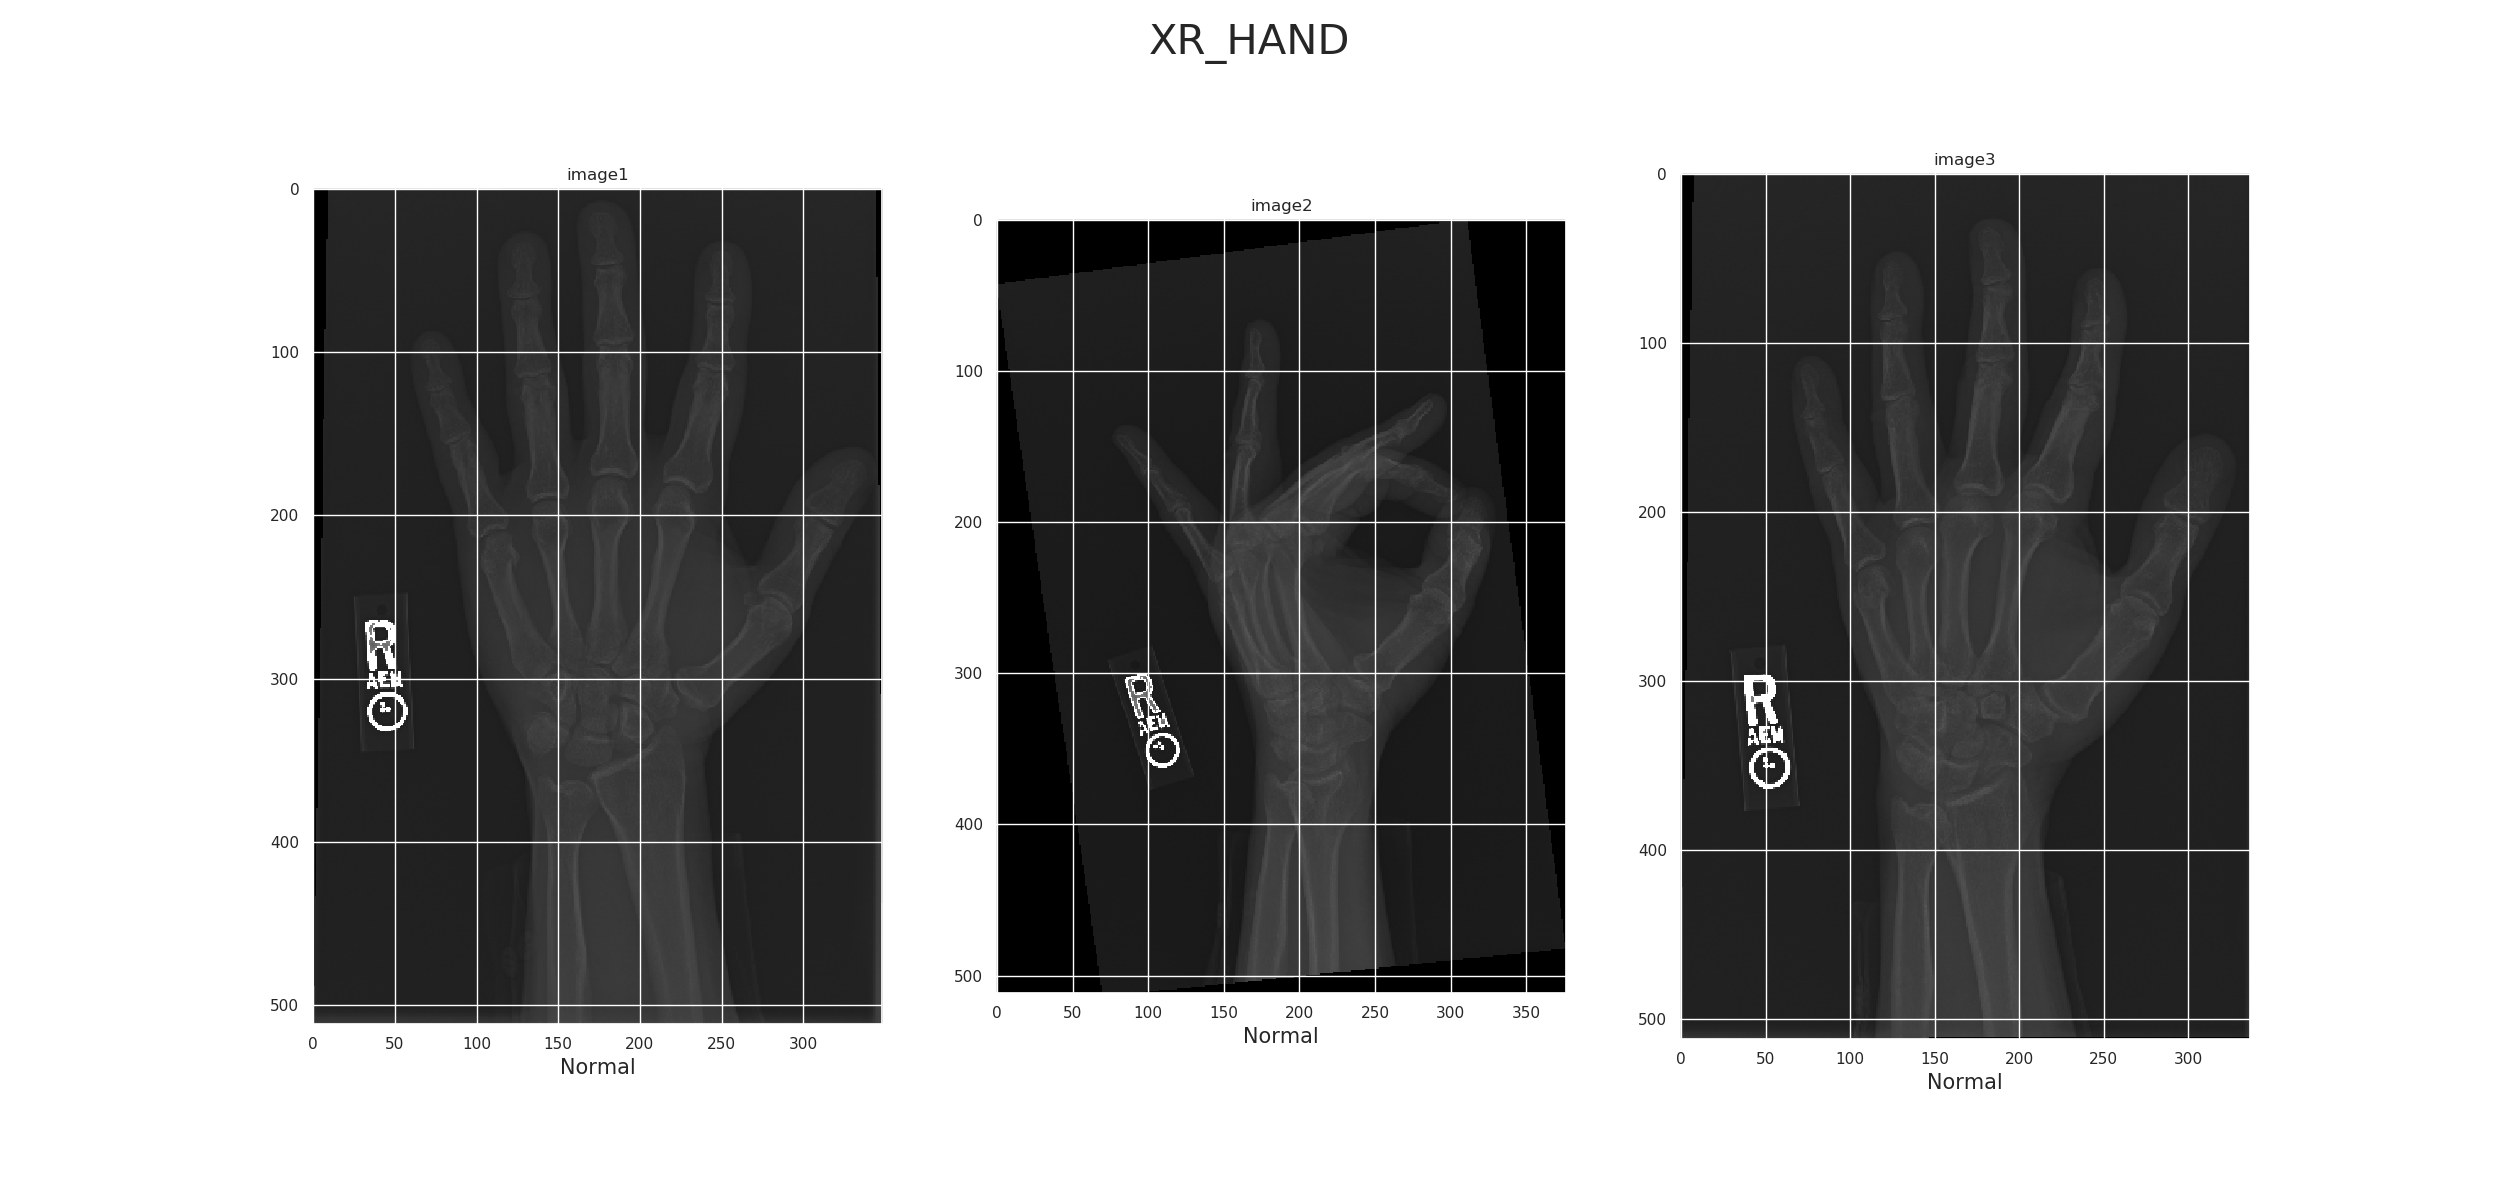

In [1]:
from IPython.display import Image
Image("img/1.png")

## 1. Import libraries

In [2]:
# General purpose libraries
import os
import shutil
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Keras libraries

from keras import optimizers
from keras.preprocessing import image

from keras.models import Sequential
from keras.models import load_model

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [4]:
# My own modules
from modules import my_utils
from modules import models
from modules import plots

## 2. Folder manipulation

In [5]:
main_folder_path = "/home/michal/Pulpit/MURA/MURA-v1.1"
dataset_path = '/home/michal/Pobrane/MURA-v1.1'
model_path = "/home/michal/Pulpit/MURA/MURA-v1.1/models"
plots_path = "/home/michal/Pulpit/MURA/MURA-v1.1/plots"

In [6]:
os.chdir(main_folder_path) # Go to main directory

### Get hand data from dataset

In [7]:
my_utils.copy_data(os.path.join(dataset_path,"train/XR_HAND"),os.path.join(main_folder_path,"train/XR_HAND"))
my_utils.copy_data(os.path.join(dataset_path,"valid/XR_HAND"),os.path.join(main_folder_path,"valid/XR_HAND"))

### Get data from CSV files

In [8]:
my_utils.create_folder(os.path.join(main_folder_path,"CSV"))
my_utils.get_csv(dataset_path,os.path.join(main_folder_path,"CSV"))

### Create train and test folders

In [9]:
hand_path = os.path.join(main_folder_path,"hand")
my_utils.create_folder(hand_path)

# Train
hand_train = os.path.join(hand_path,"train")
my_utils.create_folder(hand_train)

hand_train_normal = os.path.join(hand_train,"normal")
my_utils.create_folder(hand_train_normal)

hand_train_abnormal = os.path.join(hand_train,"abnormal")
my_utils.create_folder(hand_train_abnormal)

# Valid
hand_valid = os.path.join(hand_path,"valid")
my_utils.create_folder(hand_valid)
    
hand_valid_normal = os.path.join(hand_valid,"normal")
my_utils.create_folder(hand_valid_normal)
    
hand_valid_abnormal = os.path.join(hand_valid,"abnormal")
my_utils.create_folder(hand_valid_abnormal)

## 3. Preprocessing

In [10]:
# Open CVS files

main_structure = my_utils.get_main_f(os.listdir())
os.chdir(main_structure[5])
csv_structure = my_utils.read_csv(os.listdir())
path_train,path_valid,label_valid,label_train = my_utils.read_csv(os.listdir())
os.chdir(main_folder_path)

['/home/michal/Pulpit/MURA/MURA-v1.1/main.py']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid', '/home/michal/Pulpit/MURA/MURA-v1.1/modules']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid', '/home/michal/Pulpit/MURA/MURA-v1.1/modules', '/home/michal/Pulpit/MURA/MURA-v1.1/models']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid', '/home/michal/Pulpit/MURA/MURA-v1.1/modules', '/home/michal/Pulpit/MURA/MURA-v1.1/models', '/home/michal/Pulpit/MURA/MURA-v1.1/CSV']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/P

### GET HAND XRAY

In [11]:
#Change columns name
path_train = path_train.rename(columns = {'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png':'img'})
path_valid = path_valid.rename(columns = {'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png':'img'})

# Get only HAND directories
path_train = my_utils.get_selected_feature(path_train,"MURA-v1.1/train/XR_HAND")
path_valid = my_utils.get_selected_feature(path_valid,"MURA-v1.1/valid/XR_HAND")

# Get radiologist predictions
label_train = label_train.rename(columns = {"MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/":'img'})
label_valid = label_valid.rename(columns = {'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/':'img'})

label_train = my_utils.get_selected_feature(label_train,"XR_HAND")
label_valid = my_utils.get_selected_feature(label_valid,"XR_HAND")

# Get normal/abnormal distribution
distr_hand_train = my_utils.get_data_distribution(path_train)
distr_hand_valid = my_utils.get_data_distribution(path_valid)


# Data separation

# 1.Rename pathes
path_train = my_utils.re_path(path_train)
path_valid = my_utils.re_path(path_valid)

# 2. Separate images to folder classes

os.path.exists("/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient00008/study1_positive")
os.path.exists("/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient00008/study1_positive")

my_utils.separate_images(path_train,hand_train_abnormal,hand_train_normal)
my_utils.separate_images(path_valid,hand_valid_abnormal,hand_valid_normal)

## 4. Data Overview

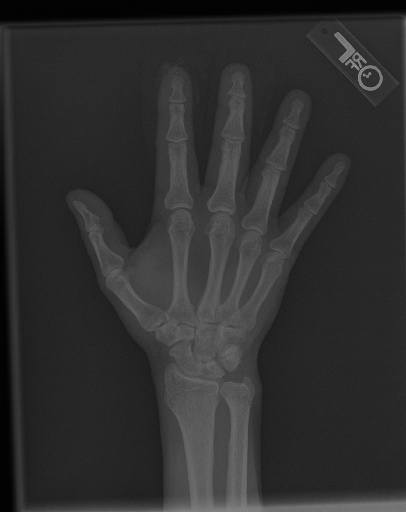

In [12]:
#Get sample image
img_path = ('/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11497/study1_positive/image1.png')
img = image.load_img(img_path)
img1 = image.img_to_array(img)
img

In [13]:
print("\nSummary of hand images : \n")

print("Image height : ", img1.shape[0])
print("Image width : ", img1.shape[1])
print("Image depth : ", img1.shape[2])

print("\nTrain images : ",len(path_train))
print("Valid images : ",len(path_valid))

print("Train abnormal img : ",len(os.listdir(hand_train_abnormal)))
print("Train normal img : ",len(os.listdir(hand_train_normal)))
print("Valid abnormal img : ",len(os.listdir(hand_valid_abnormal)))
print("Valid normal img : ",len(os.listdir(hand_valid_normal)))


Summary of hand images : 

Image height :  512
Image width :  406
Image depth :  3

Train images :  5543
Valid images :  460
Train abnormal img :  1484
Train normal img :  4059
Valid abnormal img :  189
Valid normal img :  271


### Define generators

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        hand_train,
        target_size=(300, 200),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        hand_valid,
        target_size=(300, 200),
        batch_size=32,
        class_mode='binary')

Found 5543 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


## 5. Load Models 

In [ ]:
VGG16 = models.load_trained_model("/home/michal/Pulpit/MURA/MURA-v1.1/models/VGG16.h5")
VGG16_fine_tune = models.load_trained_model("/home/michal/Pulpit/MURA/MURA-v1.1/models/VGG16_fine_tune.h5")
Resnet_fine = models.load_trained_model(("/home/michal/Pulpit/MURA/MURA-v1.1/models/RestNet_fine.h5"))

/home/michal/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:304: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### VGG16

In [ ]:
VGG16.summary()

In [ ]:
print("1. Optimizer : " + str(VGG16.optimizer))
print("2. Loss : " + str(VGG16.loss))
print("3. Metric : " + str(VGG16.metrics))

In [ ]:
VGG16_stats = models.test_model(VGG16,test_datagen,hand_valid)

In [ ]:
VGG16_stats

### VGG16 fine_tune

In [ ]:
VGG16_fine_tune.summary()

In [ ]:
print("1. Optimizer : " + str(VGG16_fine_tune.optimizer))
print("2. Loss : " + str(VGG16_fine_tune.loss))
print("3. Metric : " + str(VGG16_fine_tune.metrics))

In [ ]:
VGG16_fine_tune_stats = models.test_model(VGG16_fine_tune,test_datagen,hand_valid)

In [ ]:
VGG16_fine_tune_stats

### Resnet

In [ ]:
Resnet_fine.summary()

In [ ]:
print("1. Optimizer : " + str(Resnet_fine.optimizer))
print("2. Loss : " + str(Resnet_fine.loss))
print("3. Metric : " + str(Resnet_fine.metrics))

In [ ]:
Resnet_tune_stats = models.test_model(Resnet_fine,test_datagen,hand_valid)

In [ ]:
Resnet_tune_stats